<a href="https://colab.research.google.com/github/MdShahadatHossainbd/ML-Project/blob/main/0101_0_review_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/archive/drugsComTrain_raw.csv')
test = pd.read_csv('/content/gdrive/MyDrive/archive/drugsComTest_raw.csv')

In [ ]:
train.review

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


In [ ]:
#check the columns in train
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [ ]:
#merge train and test data

merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)

merged_data.shape   #check the shape of merged_data

(215063, 7)

In [ ]:
#check uniqueID
merged_data['uniqueID'].nunique()

215063

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215063 entries, 0 to 215062
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 11.5+ MB


In [ ]:
merged_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
uniqueID,215063.0,116039.364814,67007.913366,0.0,58115.5,115867.0,173963.5,232291.0
rating,215063.0,6.990008,3.275554,1.0,5.0,8.0,10.0,10.0
usefulCount,215063.0,28.001004,36.346069,0.0,6.0,16.0,36.0,1291.0


In [ ]:
# Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns
count = merged_data.isnull().sum().sort_values(ascending=False)
percentage = ((merged_data.isnull().sum()/len(merged_data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
condition,1194,0.555186
usefulCount,0,0.000000
date,0,0.000000
rating,0,0.000000
review,0,0.000000
drugName,0,0.000000
uniqueID,0,0.000000


Percentage for default

10    31.620967
9     17.068487
1     13.446292
8     11.645890
7      5.834104
5      4.985981
2      4.308040
3      4.053696
6      3.934661
4      3.101882
Name: rating, dtype: float64


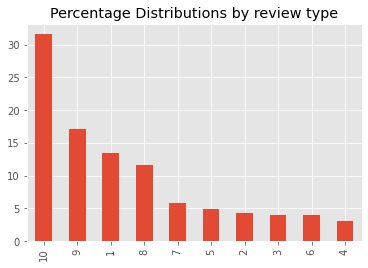

In [ ]:
# Checking for the Distribution of Default 
print('Percentage for default\n')
print(round(merged_data.rating.value_counts(normalize=True)*100,10))
round(merged_data.rating.value_counts(normalize=True)*100,10).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [ ]:
#import the libraries for pre-processing
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english')) #english stopwords
stops = [e for e in stops if e not in ('no','nor','not')]
stemmer = SnowballStemmer('english') #SnowballStemmer

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Let's take a look at the updated text
merged_data['cleaned_review'] = pd.DataFrame(merged_data.review.apply(review_to_words))
merged_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,no side effect take combin bystol mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,use take anoth oral contracept pill cycl happi...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,first time use form birth control glad went pa...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,suboxon complet turn life around feel healthie...
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,nd day mg start work rock hard erect howev exp...
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5,pull cum bit took plan b hour later took pregn...
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32,abilifi chang life hope zoloft clonidin first ...
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11,noth problem keppera constant shake arm leg pi...
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1,pill mani year doctor chang rx chateal effect ...


In [ ]:
# Model training
from sklearn.model_selection import train_test_split

Independent_var = merged_data.cleaned_review
Dependent_var = merged_data.rating

X_train, X_test, Y_train, Y_test = train_test_split(Independent_var, Dependent_var, test_size = 0.20, random_state = 225)

print('X_train :', len(X_train))
print('X_test  :', len(X_test))
print('Y_train :', len(Y_train))
print('Y_test  :', len(Y_test))

X_train : 172050
X_test  : 43013
Y_train : 172050
Y_test  : 43013


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(X_train, Y_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
confusion_matrix(predictions, Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[ 4219,   951,   633,   441,   543,   284,   325,   376,   392,
          641],
       [   76,   104,    49,    36,    47,    27,    19,    17,    22,
           22],
       [   79,    63,    95,    65,    74,    38,    36,    29,    19,
           20],
       [   19,     9,    20,    38,    19,    10,    15,     9,    12,
            6],
       [   80,    69,    94,    92,   220,   114,   108,   124,    79,
           48],
       [   32,    24,    22,    28,    31,    62,    33,    27,    27,
           21],
       [   33,    29,    54,    36,    70,    66,   161,   113,   102,
           54],
       [  148,   122,   160,   185,   339,   323,   504,  1105,   741,
          559],
       [  170,   117,   116,   120,   229,   214,   438,   959,  1765,
         1203],
       [  933,   323,   383,   308,   606,   524,   927,  2246,  4244,
        11050]])

In [ ]:
#Model prediciton
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, Y_test))
print("Precision : ", precision_score(predictions, Y_test, average = 'weighted'))
print("Confution: ", recall_score(predictions, Y_test, average = 'weighted'))

Accuracy :  0.43751888963801644
Precision :  0.6115589354271836
Recall :  0.43751888963801644


In [32]:
#new reviews
example = ["This drug bad service"]
result = model.predict(example)

print(result)

[1]


In [54]:
#new reviews
test = pd.read_csv('/content/gdrive/MyDrive/archive/drugsComTest_raw.csv')
test2 = test.review[[53765]]
test1 = test.rating[[53765]]
example = ["It works"]
result = model.predict(example)
print('read: ',test2)
print('test: ', test1)
print('Example: ',example)
print('result',result)

read:  53765    "It works!!!"
Name: review, dtype: object
test:  53765    9
Name: rating, dtype: int64
Example:  ['It works']
result [10]


In [41]:
test

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4
...,...,...,...,...,...,...,...
53761,159999,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10,13-Sep-14,43
53762,140714,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9,8-Oct-16,11
53763,130945,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8,15-Nov-10,7
53764,47656,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1,28-Nov-11,20


In [29]:
#new reviews

example = ["son halfway fourth week intuniv becam concern began last week start take highest dose two day could hard get bed cranki slept near hour drive home school vacat unusu call doctor monday morn said stick day see school get morn last two day problem free much agreeabl ever less emot good thing less cranki rememb thing overal behavior better tri mani differ medic far effect "]
result = model.predict(example)
print(result)

[8]


In [ ]:
#new reviews
example = merged_data[48928]
result = model.predict(example)
print(result)